In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('DataSetTA.xlsx')
df.head()

,id,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh-year,abcat,occRole,deploy,injSeverity,AgeCar
0,1,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,7.0
1,2,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2.0
2,3,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,9.0
3,4,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2.0
4,5,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,9.0


### Exploratory Data Anaylsis

In [3]:
# number of missing values in our dataset
df.isna().sum()

id               0
weight           0
dead             0
airbag           0
seatbelt         0
frontal          0
sex              0
ageOFocc         0
yearacc          0
yearVeh-year     1
abcat            0
occRole          0
deploy           0
injSeverity     86
AgeCar           1
dtype: int64

In [4]:
# drop the missing values from dataset
df=df.dropna(axis=0)
df=df.dropna().reset_index(drop=True)

In [5]:
# drop the id column scince it is not going to be used for the classification
df = df.drop(['id'], axis=1)

In [6]:
df['injSeverity'].value_counts()

3.0    5873
0.0    4364
1.0    3903
2.0    2895
4.0     788
5.0      88
6.0       2
Name: injSeverity, dtype: int64

In [7]:
# drop the cluster 6, because we only have 2 values and it is impossible yo predict it

df.drop(df[(df['injSeverity'] == 5.0)].index, inplace=True)
df.drop(df[(df['injSeverity'] == 6.0)].index, inplace=True)

In [8]:
df['injSeverity'].value_counts()

3.0    5873
0.0    4364
1.0    3903
2.0    2895
4.0     788
Name: injSeverity, dtype: int64

In [9]:
# lets try to look the data

df.head()

,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh-year,abcat,occRole,deploy,injSeverity,AgeCar
0,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,7.0
1,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2.0
2,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,9.0
3,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2.0
4,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,9.0


In [10]:
# lets try to check the shape of data
df.shape

(17823, 14)

In [11]:
# check the column names of data
print(df.columns.tolist())

['weight', 'dead', 'airbag', 'seatbelt', 'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh-year', 'abcat', 'occRole', 'deploy', 'injSeverity', 'AgeCar']


In [12]:
# target column
df['injSeverity'].value_counts()

3.0    5873
0.0    4364
1.0    3903
2.0    2895
4.0     788
Name: injSeverity, dtype: int64

### weights column problem

In [13]:
# we can see that the wight column have outliers because, the wieght 0 indicates it is a missing value, so we will be droping lines where the weight is equal to 0

df['weight'].value_counts()

0.000       199
47.503       88
86.221       85
31.155       75
91.427       74
           ... 
105.865       1
495.792       1
18.456        1
5442.687      1
86.225        1
Name: weight, Length: 6895, dtype: int64

In [14]:
df.drop(df[(df['weight'] == 0)].index, inplace=True)

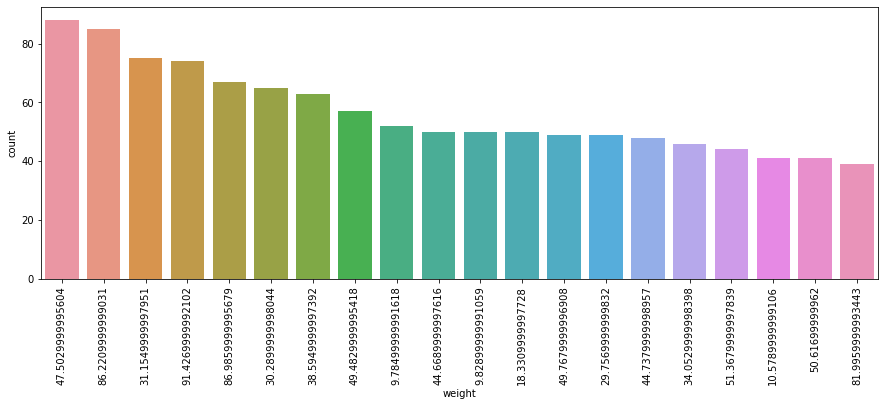

In [15]:
# now we don't have problems with the weight columns scince ther is no values 0
plt.figure(figsize=(15,5))
sns.countplot(x = 'weight', data=df,order=df['weight'].value_counts().index[:20] )
plt.xticks(rotation=90)
plt.show()

In [16]:
# encode the categorical variables into numerical variables using the label encoder

from sklearn.preprocessing import LabelEncoder

headers = ['dead','airbag','seatbelt','sex','abcat','occRole','deploy','injSeverity']

#making instance of labelencoder()
le = LabelEncoder()

for col in headers : 
    encoded = le.fit_transform(df[col])

    # removing the original column 'Purchased' from df
    df.drop(col, axis=1, inplace=True)
 
    # Appending the array to our dataFrame
    df[col] = encoded

df.head()

,weight,frontal,ageOFocc,yearacc,yearVeh-year,AgeCar,dead,airbag,seatbelt,sex,abcat,occRole,deploy,injSeverity
0,25.069,1,26,1997,1990.0,7.0,0,1,0,0,2,0,0,3
1,25.069,1,72,1997,1995.0,2.0,0,0,0,0,0,0,1,1
2,32.379,1,69,1997,1988.0,9.0,0,1,1,0,2,0,0,4
3,495.444,1,53,1997,1995.0,2.0,0,0,0,0,0,0,1,1
4,25.069,1,32,1997,1988.0,9.0,0,1,0,0,2,0,0,3


### Feature selection with correlation

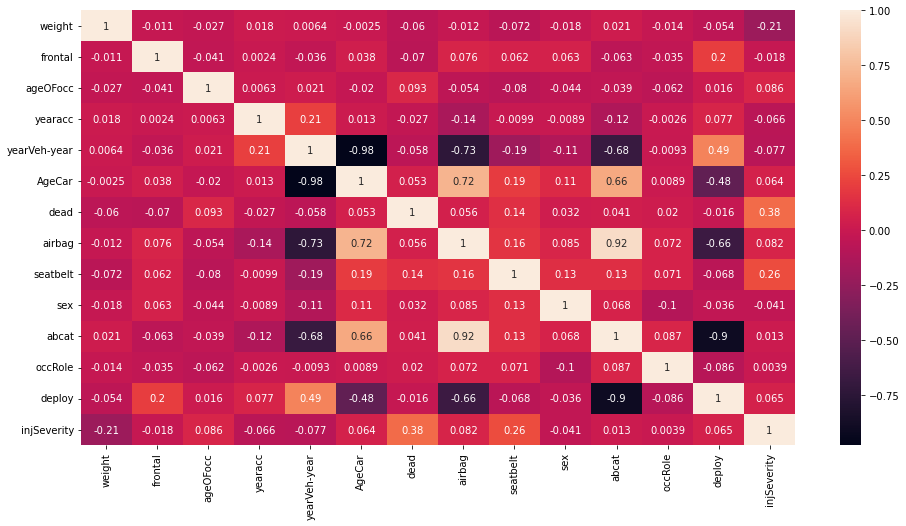

In [17]:
# correlation analysis
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

The features selection is the most important part, because we need to reduce the number of features used to reduce the bias of the model, the strategy is to choose the columns with high correlation and drop one of them, we have a big correlation between :
- AgeCar and YearVeh-year, we will drop AgeCar
- deploy and abcat, we will drop abcat 
- airbag and YearVeh-year, we will drop YearVeh-year

In [18]:
df = df.drop(['AgeCar','abcat','yearVeh-year'], axis=1)

In [19]:
import copy

# save the claned version of the dataset for further developements
df_clean = copy.deepcopy(df)
df_clean_dead = copy.deepcopy(df)

### Train Test Split

In [20]:
X = df.drop('injSeverity', axis=1).values
y = df['injSeverity'].values

In [21]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=50)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)


In [22]:
X_train.shape

(12336, 10)

In [23]:
X_test.shape

(5288, 10)

### Simple Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

dt_reg = RandomForestClassifier()
dt_reg.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred = dt_reg.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 633  287  112  256    0]
 [ 339  297  144  365    0]
 [ 228  185  115  339    2]
 [ 234  245  197 1079   16]
 [   0    0    0    7  208]]
              precision    recall  f1-score   support

           0       0.44      0.49      0.47      1288
           1       0.29      0.26      0.28      1145
           2       0.20      0.13      0.16       869
           3       0.53      0.61      0.57      1771
           4       0.92      0.97      0.94       215

    accuracy                           0.44      5288
   macro avg       0.48      0.49      0.48      5288
weighted avg       0.42      0.44      0.43      5288



### First step : Hypoparameters tuning for RandomForest and DecisionTree

We can see that our accuracy increased just by setting some spesific hypoparameters, the purpose is to do a gridsearch and try every possible combination of hypoparameters to see the improvement of the accuracy.

#### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

# Create the parameter grid based on the results of random search 
params = {'bootstrap': [True, False],
 'max_depth': [2, 3, 5, 7, 10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 20, 50, 100, 200, 300],
 'n_estimators': [ 400, 1000, 1200, 1800, 2000]}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [40]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 5, 7, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 20, 50,
                                                              100, 200, 300],
                                        'n_estimators': [400, 1000, 1200, 1800,
                                                         2000]},
                   random_state=42, verbose=2)

In [41]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       min_samples_split=300, n_estimators=1000)

In [42]:
from sklearn.ensemble import RandomForestClassifier

dt_reg = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=100, n_estimators=400)
dt_reg.fit(X_train,y_train)

y_pred = dt_reg.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 746  173    5  364    0]
 [ 385  246   17  497    0]
 [ 257  125   14  471    2]
 [ 144  150   15 1447   15]
 [   0    0    0    5  210]]
              precision    recall  f1-score   support

           0       0.49      0.58      0.53      1288
           1       0.35      0.21      0.27      1145
           2       0.27      0.02      0.03       869
           3       0.52      0.82      0.64      1771
           4       0.93      0.98      0.95       215

    accuracy                           0.50      5288
   macro avg       0.51      0.52      0.48      5288
weighted avg       0.45      0.50      0.44      5288



# SMOOT tecnique applying on 5 classifiers

In [51]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [64]:
# train test split of data with test size of 0.2
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
#traning shape of Shape 
X_train.shape

(23444, 10)

In [66]:
# testing shape of data
X_test.shape

(5861, 10)

In [69]:
from sklearn.ensemble import RandomForestClassifier

dt_reg = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=100, n_estimators=400)
dt_reg.fit(X_train,y_train)

y_pred = dt_reg.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 619  193  158  253    0]
 [ 308  307  254  290    0]
 [ 176  172  516  330    3]
 [  87  131   36  836   18]
 [   0    0    3    6 1165]]
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1223
           1       0.38      0.26      0.31      1159
           2       0.53      0.43      0.48      1197
           3       0.49      0.75      0.59      1108
           4       0.98      0.99      0.99      1174

    accuracy                           0.59      5861
   macro avg       0.58      0.59      0.58      5861
weighted avg       0.58      0.59      0.58      5861

